In [1]:
# Import all necessary packages
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import scipy as scipy
import time
import pandas as pd
from sklearn.linear_model import LinearRegression
import re
import multiprocessing
import validators 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import combinations
from itertools import repeat
from statistics import mean
import multiprocessing
import modelcrit as m
from statsmodels.stats.stattools import durbin_watson
import seaborn as sn

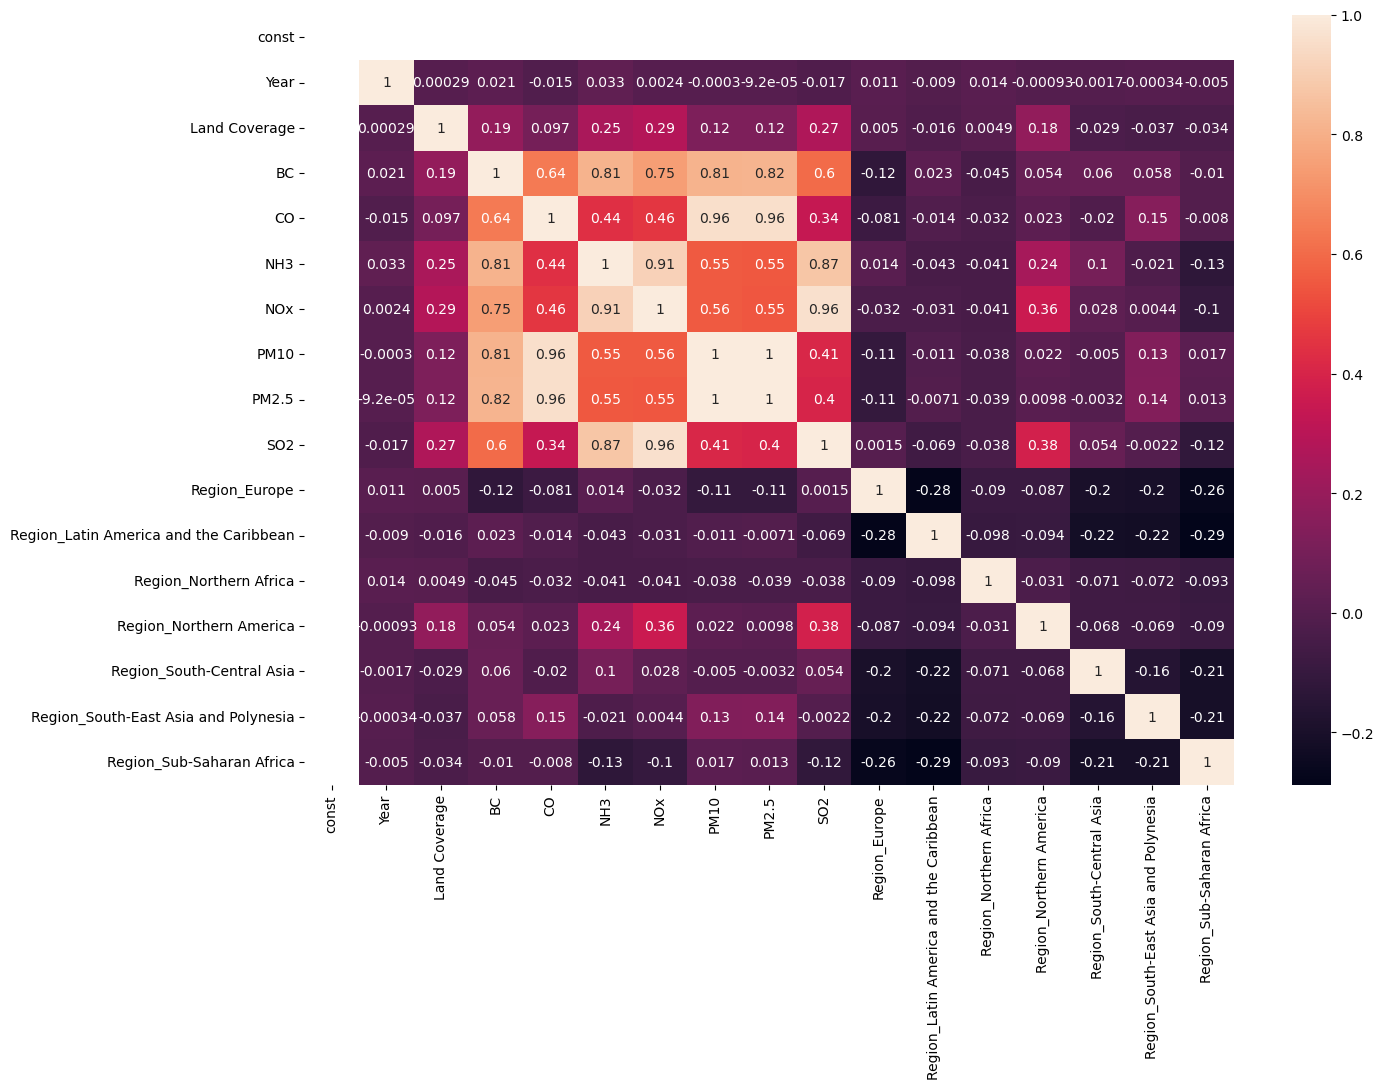

In [2]:
plt.subplots(figsize=(15,10))
sn.heatmap(m.x.corr(), annot = True) #corr matrix for all variables
plt.show()

In [3]:
def format_combinations(comb):
    outputlist = []
    for i in range(0,len(comb)):
        Combination_Extended = list(comb[i])
        if(10 in list(comb[i])):
            Combination_Extended.extend([11, 12, 13, 14, 15, 16]) #appends regional indicators, ie: either has none or all
        outputlist.append(Combination_Extended)
    return(outputlist)

start1 = time.time()
pool = multiprocessing.Pool(processes=1)  #one core processing
DF = pd.DataFrame()
for k in range(1,12):
    comb =list(combinations([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10], k)) #all combinations of models of shortterm pollutants and either all the regional indicators or none 
    outputlist = format_combinations(comb)
    K_List = pool.starmap(m.Get_Combinatorial,zip(outputlist))
    ArrangedDf = m.Get_List(K_List)
    print(k,'comb done!')
    DF = pd.concat([DF,ArrangedDf], ignore_index = True)
end1 = time.time()

1 comb done!
2 comb done!
3 comb done!
4 comb done!
5 comb done!
6 comb done!
7 comb done!
8 comb done!
9 comb done!
10 comb done!
11 comb done!


In [4]:
start2 = time.time()
pool = multiprocessing.Pool(processes=2) #two core parallel processing
DF = pd.DataFrame()
for k in range(1,12):
    comb =list(combinations([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10], k))
    outputlist = format_combinations(comb)
    K_List = pool.starmap(m.Get_Combinatorial,zip(outputlist))
    ArrangedDf = m.Get_List(K_List)
    print(k,'comb done!')
    DF = pd.concat([DF,ArrangedDf], ignore_index = True)
end2 = time.time()

1 comb done!
2 comb done!
3 comb done!
4 comb done!
5 comb done!
6 comb done!
7 comb done!
8 comb done!
9 comb done!
10 comb done!
11 comb done!


In [5]:
start3 = time.time()
pool = multiprocessing.Pool(processes=4) #four core parallel processing
DF = pd.DataFrame()
for k in range(1,12):
    comb =list(combinations([0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10], k))
    outputlist = format_combinations(comb)
    K_List = pool.starmap(m.Get_Combinatorial,zip(outputlist))
    ArrangedDf = m.Get_List(K_List)
    print(k,'comb done!')
    DF = pd.concat([DF,ArrangedDf], ignore_index = True)
end3 = time.time()

1 comb done!
2 comb done!
3 comb done!
4 comb done!
5 comb done!
6 comb done!
7 comb done!
8 comb done!
9 comb done!
10 comb done!
11 comb done!


In [9]:
print("It took", end1-start1, "seconds for 1 process", end2-start2, "seconds for 2 processes",end3-start3 ,"seconds for 4 processes")

It took 187.62331914901733 seconds for 1 process 107.26678228378296 seconds for 2 processes 65.73699116706848 seconds for 4 processes


In [10]:
DF.sort_values(by = ["AIC"], ascending=False) #table of all AIC/BIC values sorted
DF.sort_values(by = ["BIC"], ascending=False)

,Dependent,Independent,AIC,BIC,R-Squared,VIF
3,Surface Temperature Change,[CO],136441.766149,136450.566397,0.410863,1.697398
1,Surface Temperature Change,[Land Coverage],136215.858813,136224.659062,0.414974,1.709326
7,Surface Temperature Change,[PM2.5],135699.186814,135707.987063,0.40861,1.690931
6,Surface Temperature Change,[PM10],135637.322335,135646.122584,0.408556,1.690776
29,Surface Temperature Change,"[Land Coverage, CO]",135438.210247,135455.810744,0.410977,1.697728
...,...,...,...,...,...,...
1860,Surface Temperature Change,"[const, Year, Land Coverage, NH3, NOx, PM2.5, ...",56950.292933,57073.496417,0.331517,1.495925
1847,Surface Temperature Change,"[const, Year, Land Coverage, CO, NH3, NOx, SO2...",56948.90432,57072.107803,0.331536,1.495967
1859,Surface Temperature Change,"[const, Year, Land Coverage, NH3, NOx, PM10, S...",56948.746314,57071.949797,0.331538,1.495972
2031,Surface Temperature Change,"[const, Year, Land Coverage, BC, NH3, NOx, PM1...",56926.05533,57066.859311,0.331902,1.496786


In [11]:
DF.to_csv(r'/Users/benjaminsionit/Downloads/AICBICFinal.gzip', index=False, header=True,compression='gzip')
checkDF = '/Users/benjaminsionit/Downloads/AICBICFinal.gzip' #Exports final dataframe of models
checkDF = pd.read_csv(checkDF, compression='gzip')

In [13]:
best_model_num = 1988
print(DF.iloc[best_model_num].Independent)
best_model = m.X_variables[DF.iloc[best_model_num].Independent]
y = m.y

MODEL = sm.OLS(list(y),best_model).fit()
print(MODEL.summary())

['const', 'Year', 'Land Coverage', 'BC', 'NH3', 'NOx', 'PM10', 'SO2', 'Region_Europe', 'Region_Latin America and the Caribbean', 'Region_Northern Africa', 'Region_Northern America', 'Region_South-Central Asia', 'Region_South-East Asia and Polynesia', 'Region_Sub-Saharan Africa']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     1737.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:45:08   Log-Likelihood:                -28460.
No. Observations:               49033   AIC:                         5.695e+04
Df Residuals:                   49018   BIC:                         5.708e+04
Df Model:                          14                                         
Covarianc

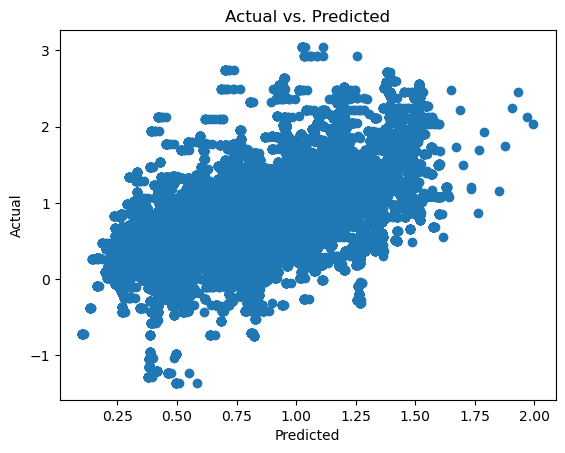

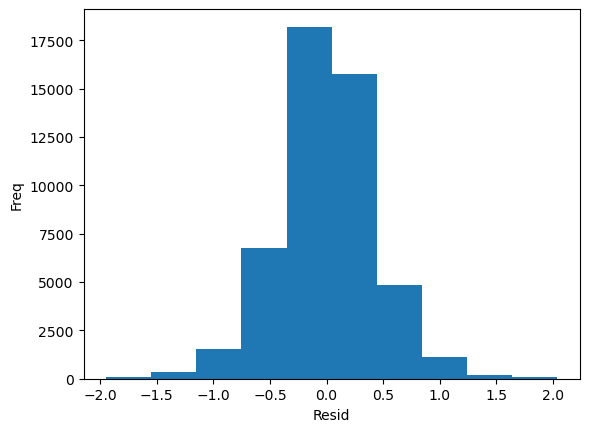

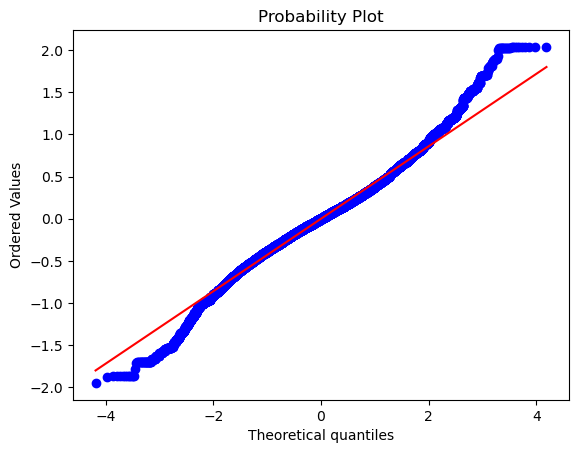

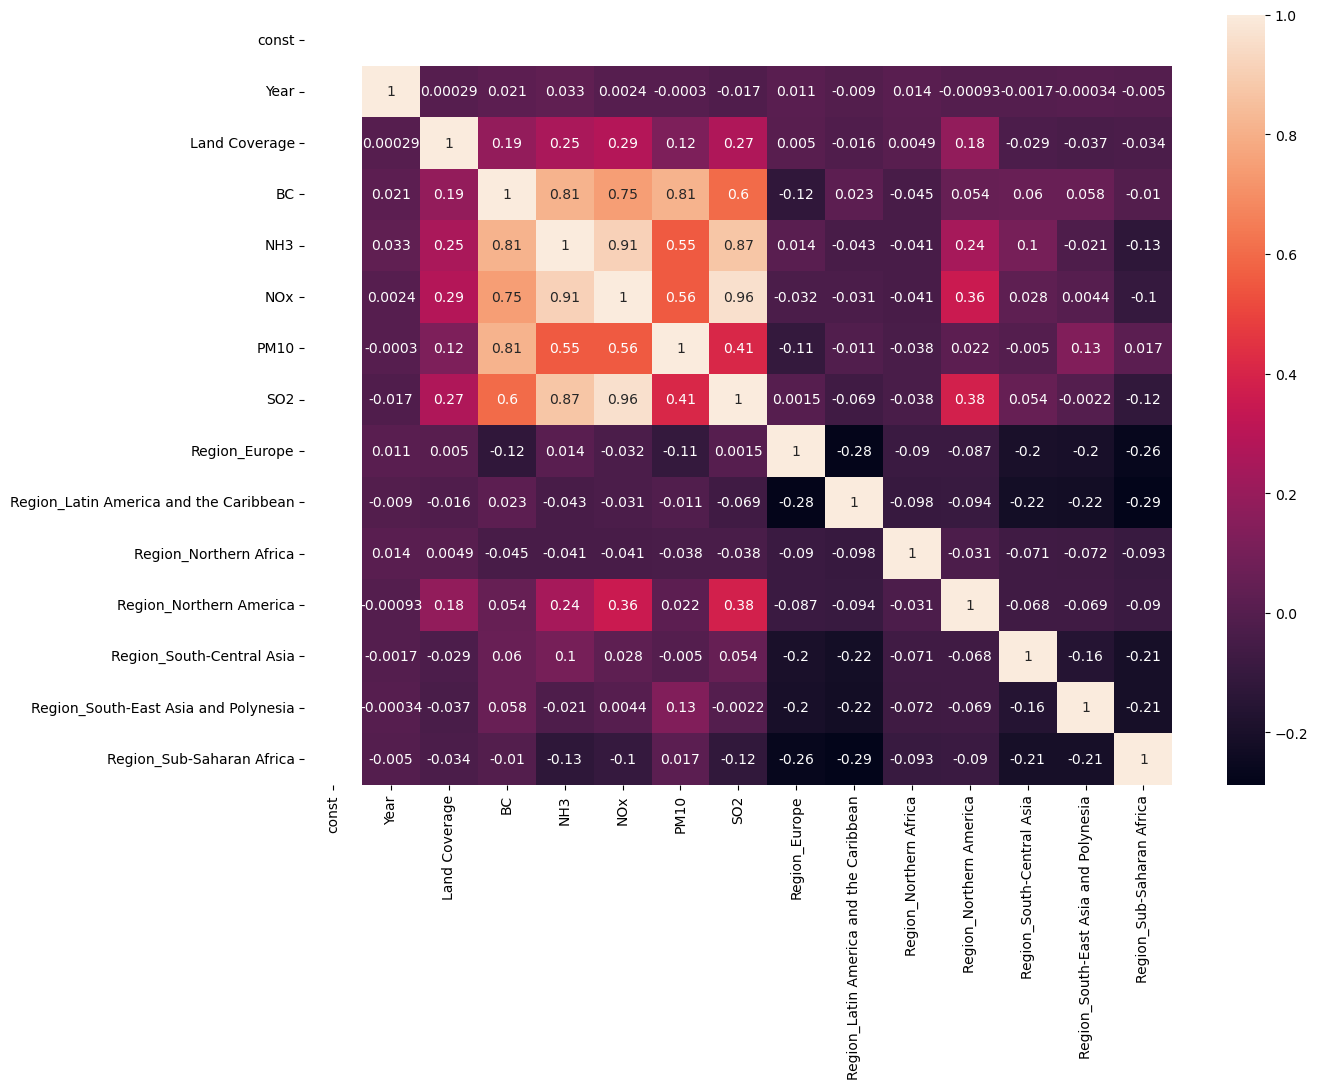

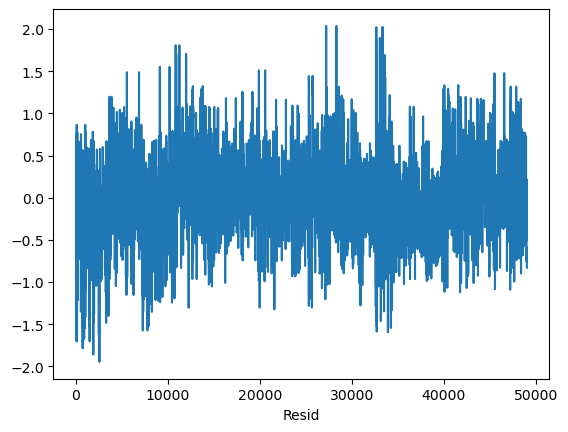

In [34]:
mpl.pyplot.scatter(MODEL.fittedvalues,list(y)) #https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/
plt.title('Actual vs. Predicted') #check for linearity
mpl.pyplot.xlabel("Predicted")
mpl.pyplot.ylabel("Actual")
plt.show()

mpl.pyplot.hist(MODEL.resid)
mpl.pyplot.xlabel("Resid") #check for normality of resid
mpl.pyplot.ylabel("Freq")
plt.show()

scipy.stats.probplot(MODEL.resid, dist="norm", plot=plt)
plt.show()



plt.subplots(figsize=(14,10)) #check for multicollinearity
sn.heatmap(best_model.corr(), annot = True) #corr mat of best AIC/BIC
plt.show()

mpl.pyplot.plot(MODEL.resid) #checks for heteroskedasticity of residuals
mpl.pyplot.xlabel("Resid")
plt.show() #Homodesc




In [15]:
# Cacculating beta parameter using SVD Decomposition
def SVD_Decomp(model,y):
    a = model.T @ model
    Xty = (model.T @ y)
    n = model.shape[0]
    k = model.shape[1]
    # SVD decomp
    start = time.time()
    u, s, vh = np.linalg.svd(a,full_matrices=False)
    smat = np.diag(s)
    smatinv = np.diag((1/(s)))
    uinv = np.linalg.inv(u)
    vhinv = np.linalg.inv(vh)
    # Calculating beta
    VhSMatU_Inv_Prod = (vhinv @ smatinv @ uinv)
    beta1 = VhSMatU_Inv_Prod @ Xty
    K1 = y - (model)@beta1
    var1 = (K1.T @ K1)/(n - k) # Calculating variance
    std_error1 = var1 * np.diag(VhSMatU_Inv_Prod) # Calculating standard error
    end = time.time()
    df = pd.DataFrame({'time': [end - start],"beta": [beta1], "standard error": [std_error1]})
    return(df)

In [16]:
# Cacculating beta parameter using LU Decomposition
def LU_Decomp(model,y):
    a = model.T @ model
    Xty = (model.T @ y)
    n = model.shape[0]
    k = model.shape[1]
    # LU Decomposition
    start = time.time()
    P, L, U = scipy.linalg.lu(a)
    Pinv =  np.linalg.inv(P)
    Uinv =  np.linalg.inv(U)
    Linv =  np.linalg.inv(L)
    PLU_Inv_Prod = (Uinv @ Linv @ Pinv)
    # Calculating beta
    beta2 = PLU_Inv_Prod @ Xty
    K2 = y - (model)@beta2
    var2 = (K2.T @ K2)/(n-k)# Calculating variance
    std_error2 = var2 * np.diag(PLU_Inv_Prod) # Calculating standard error
    end = time.time()
    df = pd.DataFrame({'time': [end - start],"beta": [beta2], "standard error": [std_error2]})
    return(df)

In [17]:
# Cacculating beta parameter using Cholesky Decomposition
def Cholesky_Decomp(model,y):
    # Cholesky decomposition
    a = model.T @ model
    Xty = (model.T @ y)
    n = model.shape[0]
    k = model.shape[1]
    start = time.time()
    L = np.linalg.cholesky(a)
    Linv = np.linalg.inv(L)
    LLt_Inv_Prod = (Linv.T @ Linv)
    beta3 = LLt_Inv_Prod @ Xty
    K3 = y - (model)@beta3
    var3 = (K3.T @ K3)/(n-k)# Calculating variance
    std_error3 = var3 * np.diag((LLt_Inv_Prod)) # Calculating standard error
    end = time.time()
    df = pd.DataFrame({'time': [end - start],"beta": [beta3], "standard error": [std_error3]})
    return(df)

In [18]:
# Cacculating beta parameter using QR Decomposition
def QR_Decomp(model,y):
    a = model.T @ model
    Xty = (model.T @ y)
    n = model.shape[0]
    k = model.shape[1]
    # QR Decomposition
    start = time.time()
    Q, R = scipy.linalg.qr(a)
    Qinv = np.linalg.inv(Q)
    Rinv = np.linalg.inv(R)
    RQ_Inv_Prod = (Rinv @ Qinv)
    # Calculating beta
    beta4 = RQ_Inv_Prod @ Xty
    K4 = y - (model)@beta4
    var4 = (K4.T @ K4)/(n-k)# Calculating variance
    std_error4 = var4 * np.diag(RQ_Inv_Prod) # Calculating standard error
    end = time.time()
    df = pd.DataFrame({'time': [end - start],"beta": [beta4], "standard error": [std_error4]})
    return(df)

In [19]:
list(LU_Decomp(best_model,y)['beta'])

[array([-6.20295395e+01,  3.11915177e-02,  5.01726548e-07, -1.54194809e-04,
        -1.01658662e-04,  5.26206691e-04, -2.47132401e-05, -6.47536979e-04,
         6.03229697e-01,  1.64150554e-01,  6.82712319e-01,  3.59253115e-01,
         2.84462752e-01,  1.35751726e-01,  3.21018394e-01])]

In [20]:
list(Cholesky_Decomp(best_model,y)['beta'])

[array([-6.20295395e+01,  3.11915177e-02,  5.01726548e-07, -1.54194809e-04,
        -1.01658662e-04,  5.26206691e-04, -2.47132401e-05, -6.47536979e-04,
         6.03229697e-01,  1.64150554e-01,  6.82712319e-01,  3.59253115e-01,
         2.84462752e-01,  1.35751726e-01,  3.21018394e-01])]

In [21]:
list(QR_Decomp(best_model,y)['beta'])

[array([-6.20295151e+01,  3.11915056e-02,  5.01726516e-07, -1.54195627e-04,
        -1.01658611e-04,  5.26206828e-04, -2.47132456e-05, -6.47537342e-04,
         6.03229683e-01,  1.64150538e-01,  6.82712313e-01,  3.59253106e-01,
         2.84462738e-01,  1.35751717e-01,  3.21018383e-01])]

In [22]:
list(SVD_Decomp(best_model,y)['beta'])

[array([-6.20293800e+01,  3.11914382e-02,  5.01726340e-07, -1.54200162e-04,
        -1.01658328e-04,  5.26207588e-04, -2.47132760e-05, -6.47539353e-04,
         6.03229607e-01,  1.64150450e-01,  6.82712282e-01,  3.59253056e-01,
         2.84462661e-01,  1.35751668e-01,  3.21018319e-01])]

In [48]:
count1 = 0
count2 = 0
count3 = 0
count4 = 0
for x in range(0,100):
    time1 = float(SVD_Decomp(best_model,y)['time'])
    time2 = float(LU_Decomp(best_model,y)['time'])
    time3 = float(Cholesky_Decomp(best_model,y)['time'])
    time4 = float(QR_Decomp(best_model,y)['time'])
    lists = np.asarray([time1,time2,time3,time4])
    minimum = np.ndarray.min(lists)
    if(time1 == minimum):
        count1 = count1 + 1
    elif(time2 == minimum):
        count2 = count2 + 1
    elif(time3 == minimum):
        count3 = count3 + 1
    elif(time4 == minimum):
        count4 = count4 + 1
print(count1,count2,count3,count4) #times of the 100 runs where either SVD, LU, Cho, QR is fastest

8 22 63 7


In [49]:
X_variables = m.X_variables

In [54]:
BetaDf = pd.DataFrame(columns = ["Beta0","Beta1", "Beta2", "Beta3", "Beta4", "Beta5","Beta6", "Beta7", "Beta8", "Beta9", "Beta10","Beta11", "Beta12", "Beta13", "Beta14"])
SEDf = pd.DataFrame(columns = ["SE0","SE1", "SE2", "SE3", "SE4", "SE5","SE6", "SE7", "SE8", "SE9", "SE10","SE11", "SE12", "SE13", "SE14"])
X_variables["Surface Temperature Change"] = y
NumSim = 1000
for i in range(0,NumSim):
    Simulation_Study = X_variables.iloc[np.random.randint(0, 49032,2452)] #random sample of 5% of all the dataframe rows
    SimX = Simulation_Study[DF.iloc[best_model_num].Independent]
    SimY = Simulation_Study['Surface Temperature Change']
    BetaRowDf = pd.DataFrame(pd.Series.explode(Cholesky_Decomp(SimX,SimY)['beta'])).T
    SERowDf = pd.DataFrame(pd.Series.explode(Cholesky_Decomp(SimX,SimY)['standard error'])).T
    BetaRowDf.columns = ["Beta0","Beta1", "Beta2", "Beta3", "Beta4", "Beta5","Beta6", "Beta7", "Beta8", "Beta9", "Beta10","Beta11", "Beta12", "Beta13", "Beta14"]
    SERowDf.columns = ["SE0","SE1", "SE2", "SE3", "SE4", "SE5","SE6", "SE7", "SE8", "SE9", "SE10","SE11", "SE12", "SE13", "SE14"]
    BetaDf = pd.concat([BetaDf,BetaRowDf]) #append it to a dataframe of all the Beta estimates
    SEDf = pd.concat([SEDf,SERowDf])
[BetaHat0, BetaHat1, BetaHat2, BetaHat3, BetaHat4, BetaHat5, BetaHat6, BetaHat7, BetaHat8, BetaHat9, BetaHat10, BetaHat11, BetaHat12, BetaHat13, BetaHat14] = list(np.concatenate(Cholesky_Decomp(best_model,y)['beta']).flat) #true population betas ie: whole dataset
[SEHat0, SEHat1, SEHat2, SEHat3, SEHat4, SEHat5, SEHat6, SEHat7, SEHat8, SEHat9, SEHat10, SEHat11, SEHat12, SEHat13, SEHat14] = list(np.concatenate(Cholesky_Decomp(best_model,y)['standard error']).flat)

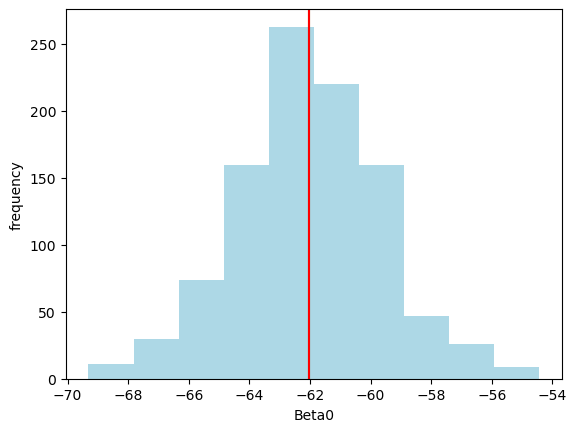

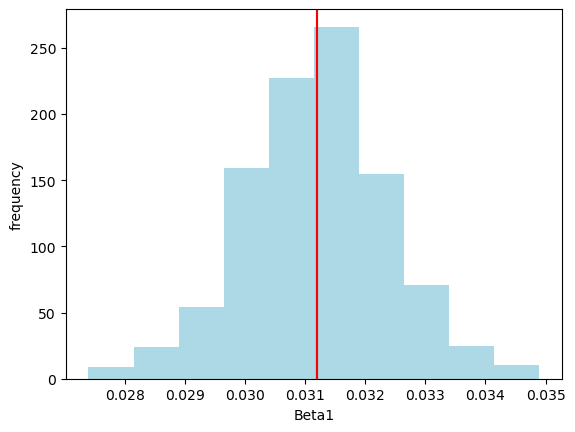

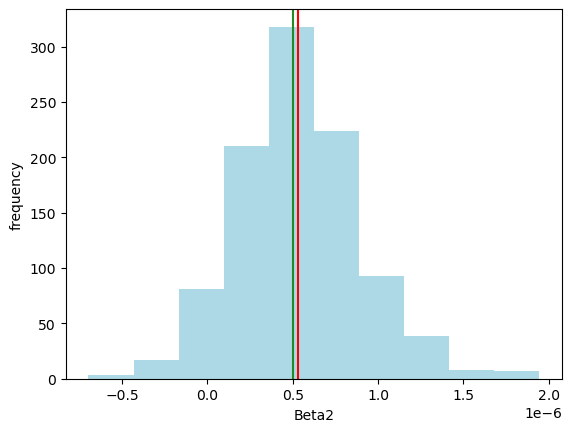

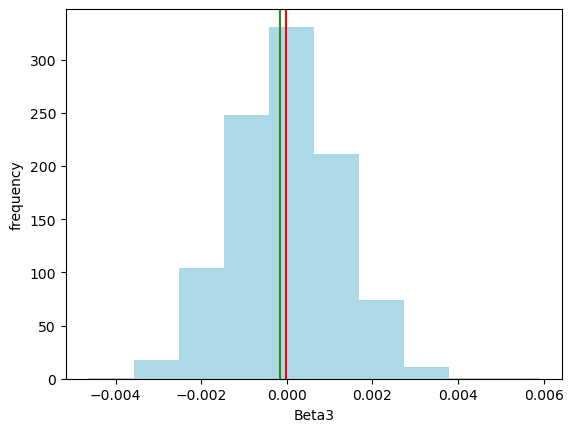

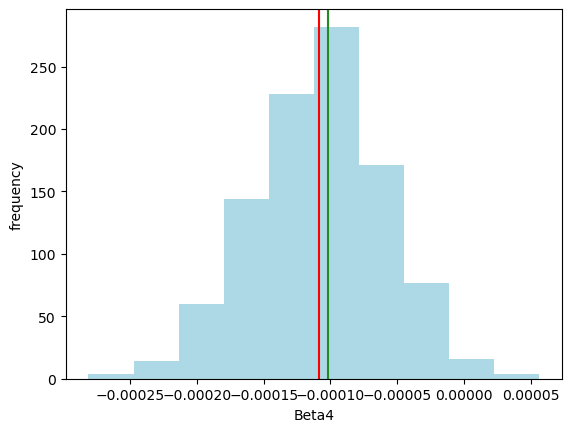

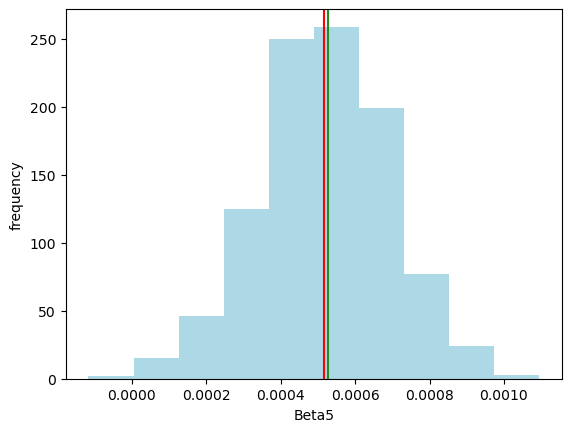

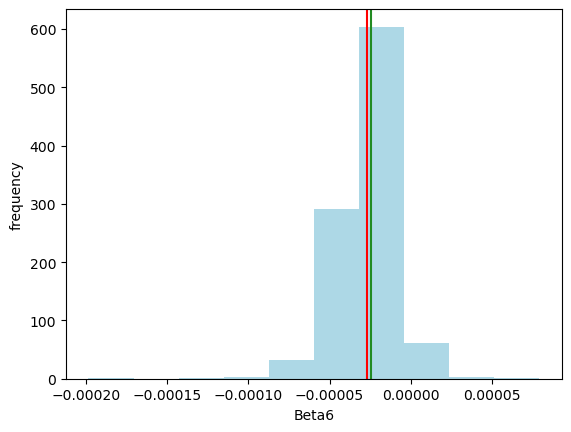

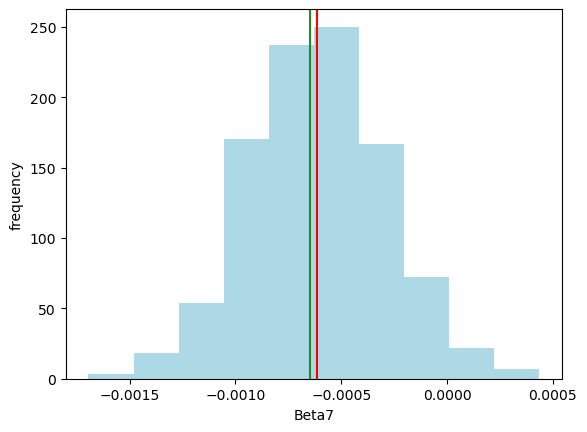

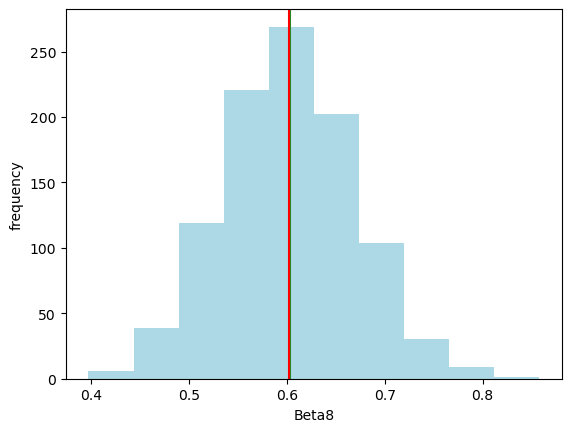

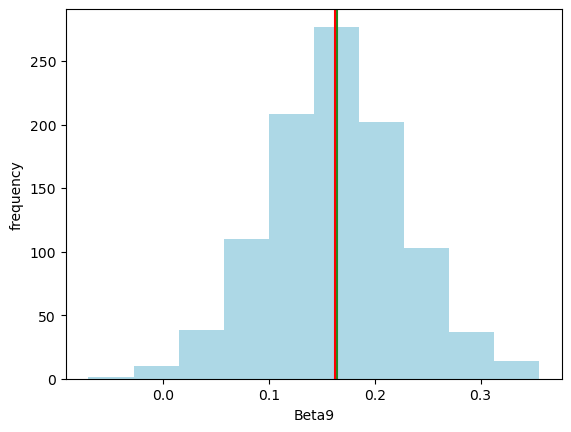

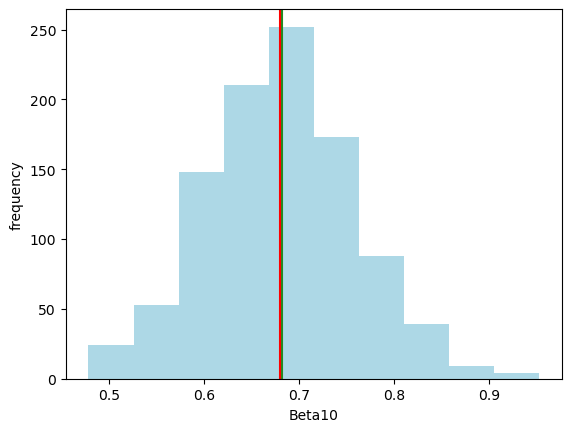

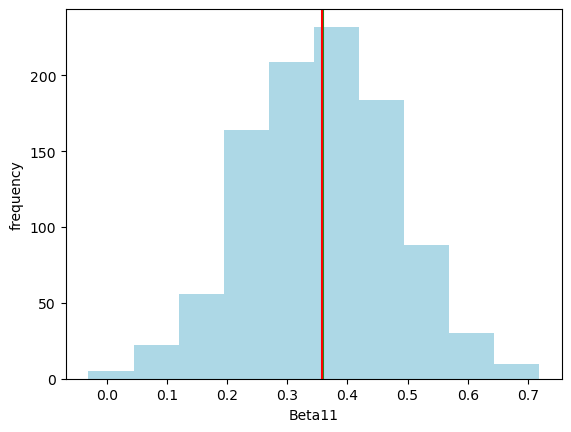

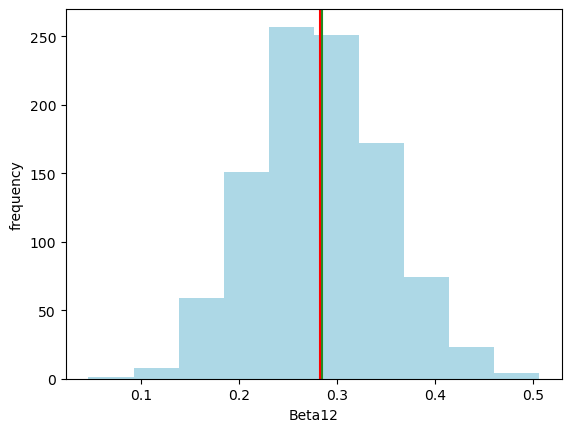

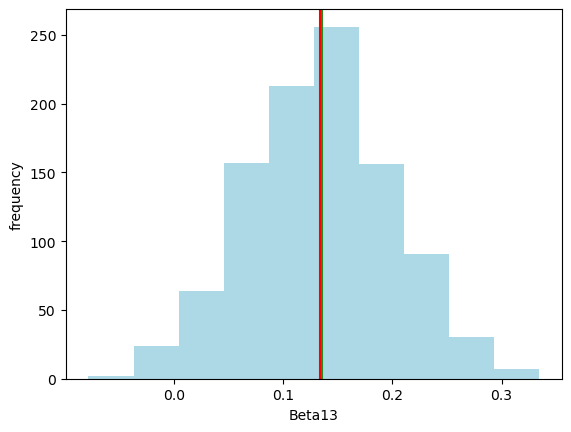

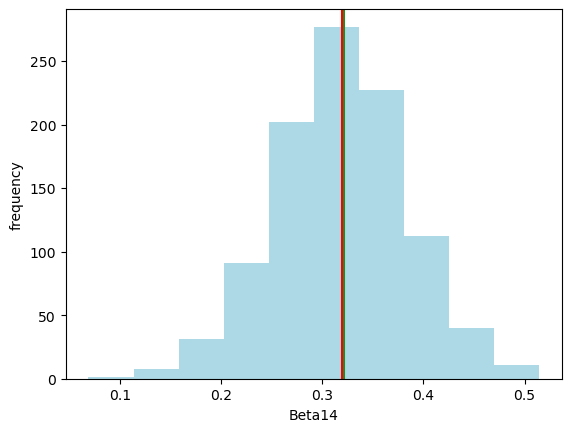

In [55]:
BetaNames = ["Beta0","Beta1", "Beta2", "Beta3", "Beta4", "Beta5","Beta6", "Beta7", "Beta8", "Beta9", "Beta10","Beta11", "Beta12", "Beta13", "Beta14"]
BetaHatNames = [BetaHat0, BetaHat1, BetaHat2, BetaHat3, BetaHat4, BetaHat5, BetaHat6, BetaHat7, BetaHat8, BetaHat9, BetaHat10, BetaHat11, BetaHat12, BetaHat13, BetaHat14]
SENames = ["SE0","SE1", "SE2", "SE3", "SE4", "SE5","SE6", "SE7", "SE8", "SE9", "SE10","SE11", "SE12", "SE13", "SE14"]
SEHatNames = [SEHat0, SEHat1, SEHat2, SEHat3, SEHat4, SEHat5, SEHat6, SEHat7, SEHat8, SEHat9, SEHat10, SEHat11, SEHat12, SEHat13, SEHat14]

for i in range(0,len(BetaNames)):
    mpl.pyplot.hist(BetaDf[BetaNames[i]],color = "lightblue")
    plt.axvline(x = BetaHatNames[i], color = '#228B22', label = 'axvline - full height')
    plt.axvline(x = mean(BetaDf[BetaNames[i]]), color = 'r', label = 'axvline - full height')
    mpl.pyplot.xlabel(BetaNames[i])
    mpl.pyplot.ylabel('frequency')
    mpl.pyplot.show() #plots histogram of all betas for 1000 subset samples, red line is estimated green is true beta value

In [56]:
NotSignifList = []
alpha = .05
for i in range(0,len(BetaNames)):
    sortedBetas = BetaDf[BetaNames[i]].sort_values()
    print("The 95% CI for",BetaNames[i],"is ",(sortedBetas[int(alpha/2 * NumSim)],sortedBetas[int((1-alpha/2)*NumSim)]))
    if(np.sign(sortedBetas[int(alpha/2 * NumSim)])*np.sign(sortedBetas[int((1-alpha/2) * NumSim)]) == -1):
        NotSignifList.extend([i])
        print("Since this CI contains 0",BetaNames[i], "is not significant")

The 95% CI for Beta0 is  (-66.76577354600886, -57.28231931175833)
The 95% CI for Beta1 is  (0.028848799308011763, 0.03363291526240175)
The 95% CI for Beta2 is  (-1.4533929009739367e-07, 1.3182511699089036e-06)
Since this CI contains 0 Beta2 is not significant
The 95% CI for Beta3 is  (-0.0024129930952898615, 0.00247036198722439)
Since this CI contains 0 Beta3 is not significant
The 95% CI for Beta4 is  (-0.00020272366566559397, -1.3359550144753651e-05)
The 95% CI for Beta5 is  (0.0001531268925356044, 0.0008660925470658221)
The 95% CI for Beta6 is  (-6.493369724368259e-05, 5.259353400985205e-06)
Since this CI contains 0 Beta6 is not significant
The 95% CI for Beta7 is  (-0.0012397818812210915, 5.5382152851612965e-05)
Since this CI contains 0 Beta7 is not significant
The 95% CI for Beta8 is  (0.4739360324649837, 0.7344316219051201)
The 95% CI for Beta9 is  (0.03829123353834518, 0.29252695933312367)
The 95% CI for Beta10 is  (0.53030570616923, 0.8355632890942388)
The 95% CI for Beta11 is 

In [57]:
best_model.columns[NotSignifList]

Index(['Land Coverage', 'BC', 'PM10', 'SO2'], dtype='object')

In [73]:
BetaDf = pd.DataFrame({'Name': best_model.columns,'Beta': BetaHatNames})
BetaDf.drop([2,3,6,7])

,Name,Beta
0,const,-62.029539
1,Year,0.031192
4,NH3,-0.000102
5,NOx,0.000526
8,Region_Europe,0.603230
9,Region_Latin America and the Caribbean,0.164151
10,Region_Northern Africa,0.682712
11,Region_Northern America,0.359253
12,Region_South-Central Asia,0.284463
13,Region_South-East Asia and Polynesia,0.135752
